In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('embedding_test.csv')
# Tirando outlier absurdo do primeiro teste
df = df.drop(0)

In [3]:
filtered = df.loc[df['table'].isin(['img_pgarray', 'img_pgarray_clip', 'img_pgvector'])]

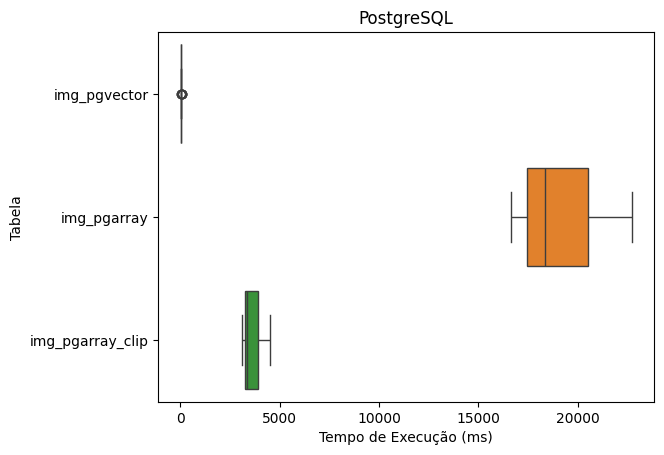

In [4]:
plot = sns.boxplot(filtered, x='execution_time', y='table', hue='table')
plot.set(xlabel = "Tempo de Execução (ms)", ylabel = "Tabela")
plot.set_title("PostgreSQL")
plot.figure.savefig("./graphs/execucao-array-vs-vector.png")

In [5]:
filtered = df.loc[df['table'].isin(['img_pgvector', 'img_pgvector_clip', 'img_pgvector_clip (no index)'])]

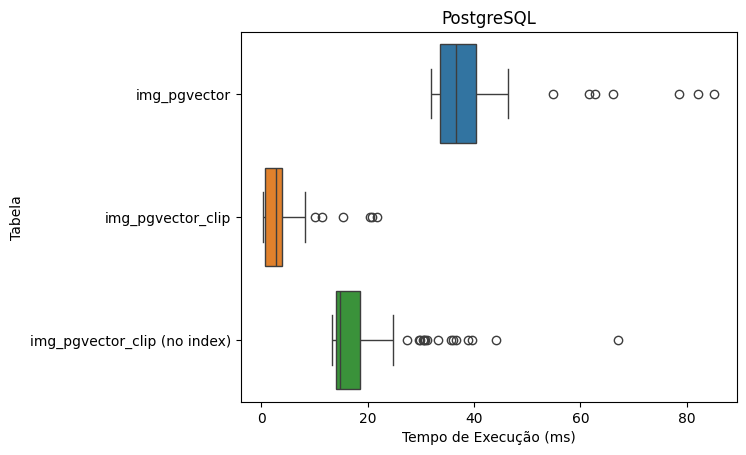

In [6]:
plot = sns.boxplot(filtered, x='execution_time', y='table', hue='table')
plot.set(xlabel = "Tempo de Execução (ms)", ylabel = "Tabela")
plot.set_title("PostgreSQL")
plot.figure.savefig("./graphs/execucao-index-vs-noindex.png")

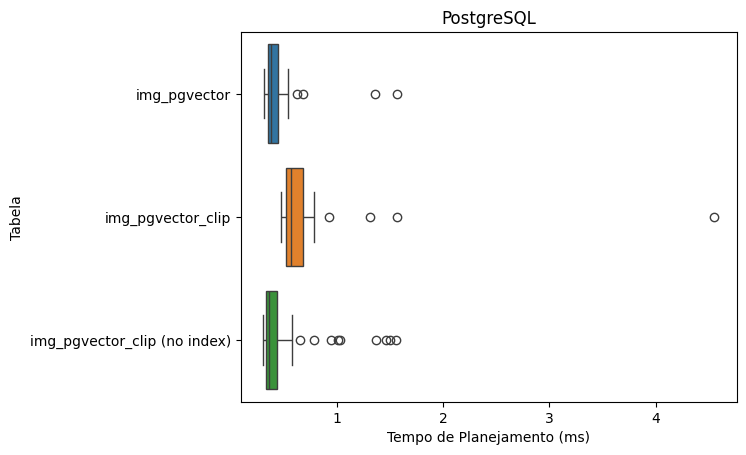

In [7]:
plot = sns.boxplot(filtered, x='planning_time', y='table', hue='table')
plot.set_ylabel("Tabela")
plot.set_xlabel("Tempo de Planejamento (ms)")
plot.set_title("PostgreSQL")
plot.figure.savefig("./graphs/planing-index-vs-noindex.png")

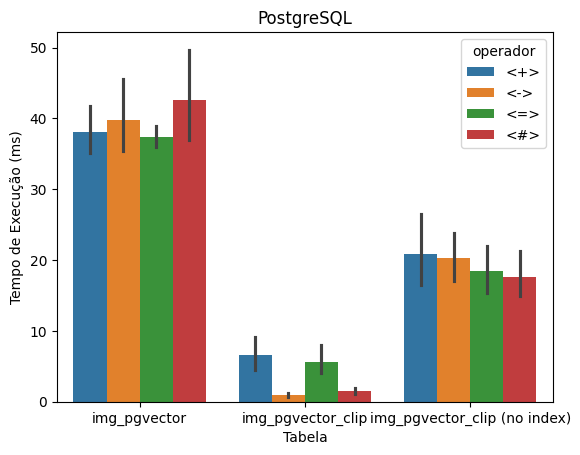

In [8]:
plot = sns.barplot(filtered, x='table', y='execution_time', hue='operator')
plot.set_xlabel("Tabela")
plot.set_ylabel("Tempo de Execução (ms)")
plot.legend(title="operador")
plot.set_title("PostgreSQL")
plot.figure.savefig("./graphs/execucao-operadores-tabela.png")

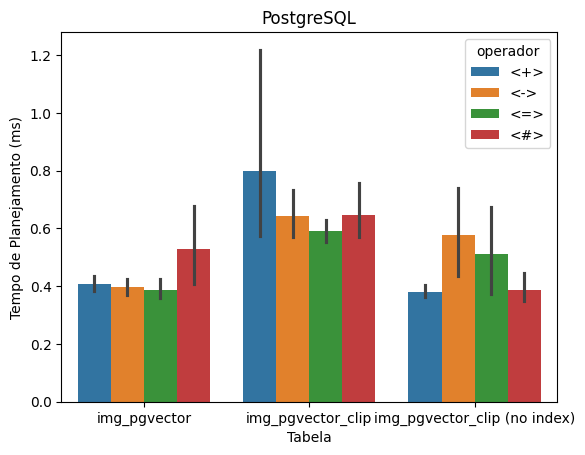

In [9]:
plot = sns.barplot(filtered, x='table', y='planning_time', hue='operator')
plot.set_xlabel("Tabela")
plot.set_ylabel("Tempo de Planejamento (ms)")
plot.legend(title="operador")
plot.set_title("PostgreSQL")
plot.figure.savefig("./graphs/planning-operadores-tabela.png")

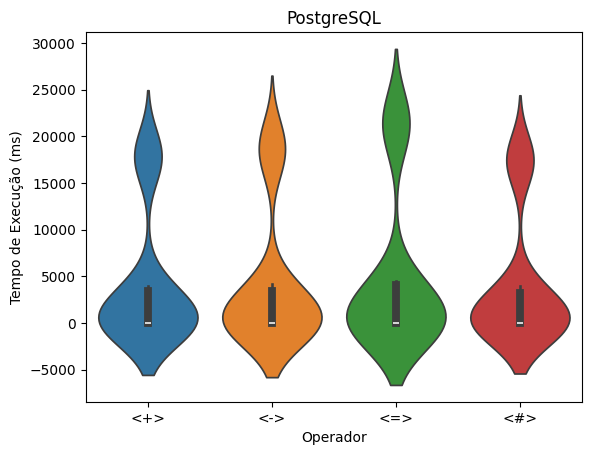

In [10]:
plot = sns.violinplot(df, x='operator', y='execution_time', hue='operator')
plot.set_xlabel("Operador")
plot.set_ylabel("Tempo de Execução (ms)")
plot.set_title("PostgreSQL")
plot.figure.savefig("./graphs/execucao-operadores.png")

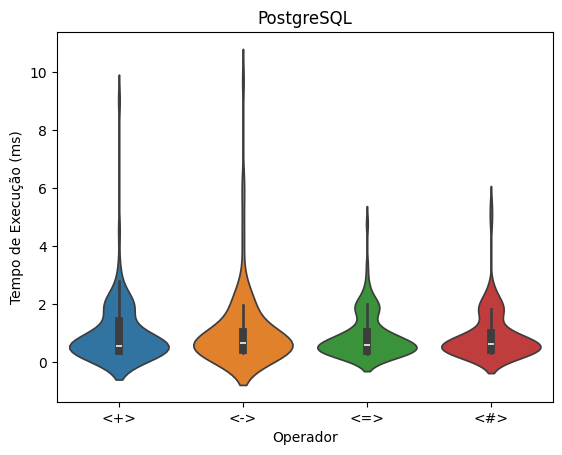

In [11]:
plot = sns.violinplot(df, x='operator', y='planning_time', hue='operator')
plot.set_xlabel("Operador")
plot.set_ylabel("Tempo de Execução (ms)")
plot.set_title("PostgreSQL")
plot.figure.savefig("./graphs/planning-operadores.png")

In [13]:
df = pd.read_csv("approximate_index_test.csv")
df

,Unnamed: 0,test_num,operator,index_similarity,no_index_similarity
0,0,0,<+>,460.442139,460.442139
1,1,0,<+>,462.155884,462.155884
2,2,0,<+>,466.202759,466.202759
3,3,0,<+>,466.363831,466.363831
4,4,0,<+>,466.542023,466.542023
...,...,...,...,...,...
282,282,14,<#>,-27.980701,-28.590479
283,283,14,<#>,-27.071392,-28.099432
284,284,14,<#>,-26.624104,-27.980701
285,285,14,<#>,-26.236454,-27.565880


In [21]:
summary = df.copy()
summary['abs_diff'] = abs(summary['index_similarity'] - summary['no_index_similarity'])
group_stats = summary.groupby(['operator'])['abs_diff'].agg(['mean', 'max', 'std']).reset_index()
group_stats

,operator,mean,max,std
0,<#>,6.768624,21.270160,5.192791
1,<+>,0.553424,4.093964,0.937419
2,<->,0.495692,1.288897,0.359100
3,<=>,0.002328,0.015408,0.004057


In [105]:
postgres = pd.read_csv('./embedding_test.csv')
postgres = postgres.drop(0)

milvus = pd.read_csv('./milvus_embedding_test.csv')
# Os dados de execução do milvus estão em segundos, não mili
milvus.execution_time *= 1000
milvus.head()

,Unnamed: 0,table,operator,execution_time
0,0,vector_768 (no index),COSINE,7.094
1,1,vector_768 (no index),COSINE,5.836
2,2,vector_768 (no index),COSINE,6.141
3,3,vector_768 (no index),COSINE,5.975
4,4,vector_768 (no index),COSINE,5.632


In [106]:
# Aqui faremos a tabela do postgres ter comparações somente com os operadores do milvus
operator_map = {
    '<+>': 'L1',
    '<->': 'L2',
    '<=>': 'COSINE',
    '<#>': 'IP'
}

postgres['operator'] = postgres['operator'].replace(operator_map)
postgres = postgres.loc[postgres['operator'].isin(milvus.operator.unique())].drop('planning_time', axis=1)
postgres = postgres.loc[postgres['table'].isin(['img_pgvector', 'img_pgvector_clip', 'img_pgvector_clip (no index)'])]
postgres.head()

,Unnamed: 0,table,operator,execution_time
20,20,img_pgvector,L2,61.589
21,21,img_pgvector,L2,37.124
22,22,img_pgvector,L2,33.414
23,23,img_pgvector,L2,32.615
24,24,img_pgvector,L2,38.142


In [107]:
postgres['dbms'] = 'PostgreSQL'
milvus['dbms'] = 'Milvus'

In [108]:
df = pd.concat([postgres, milvus], ignore_index=True)
df

,Unnamed: 0,table,operator,execution_time,dbms
0,20,img_pgvector,L2,61.589,PostgreSQL
1,21,img_pgvector,L2,37.124,PostgreSQL
2,22,img_pgvector,L2,33.414,PostgreSQL
3,23,img_pgvector,L2,32.615,PostgreSQL
4,24,img_pgvector,L2,38.142,PostgreSQL
...,...,...,...,...,...
415,235,vector_4096,IP,7.775,Milvus
416,236,vector_4096,IP,12.887,Milvus
417,237,vector_4096,IP,8.430,Milvus
418,238,vector_4096,IP,8.483,Milvus


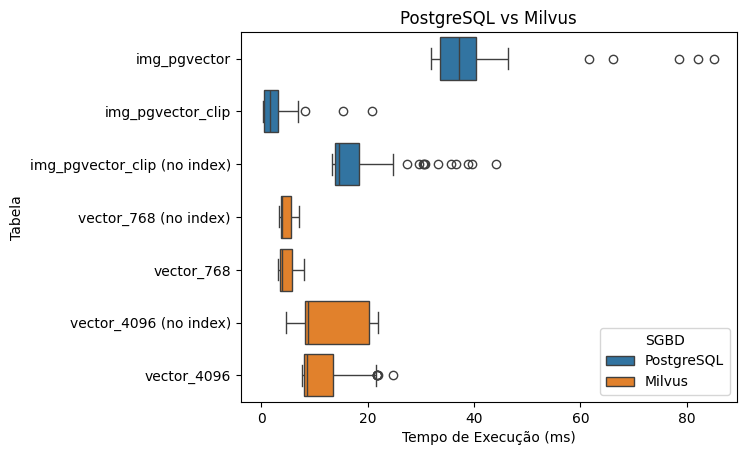

In [114]:
plot = sns.boxplot(df, x='execution_time', y='table', hue='dbms')
plot.set(xlabel = "Tempo de Execução (ms)", ylabel = "Tabela")
plot.set_title("PostgreSQL vs Milvus")
plot.legend(title = "SGBD")
plot.figure.savefig("./graphs/execucao-postgres-vs-milvus.png")

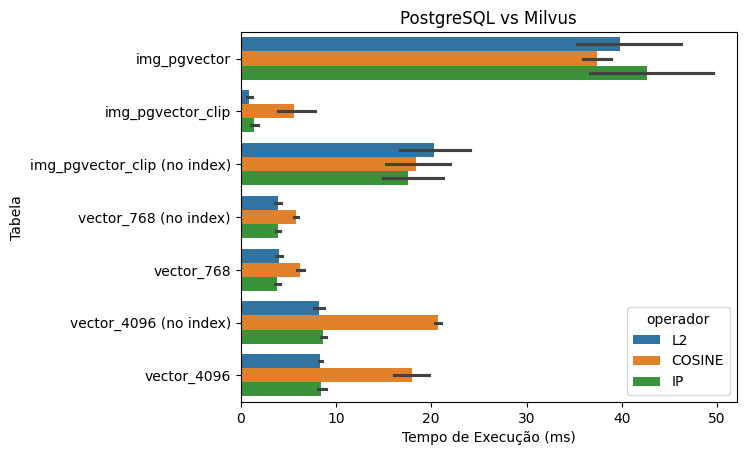

In [127]:
plot = sns.barplot(df, x='execution_time', y='table', hue='operator')
plot.set_xlabel("Tempo de Execução (ms)")
plot.set_ylabel("Tabela")
plot.legend(title="operador")
plot.set_title("PostgreSQL vs Milvus")
plot.figure.savefig("./graphs/execucao-postgres-vs-milvus-operadores-tabela.png")

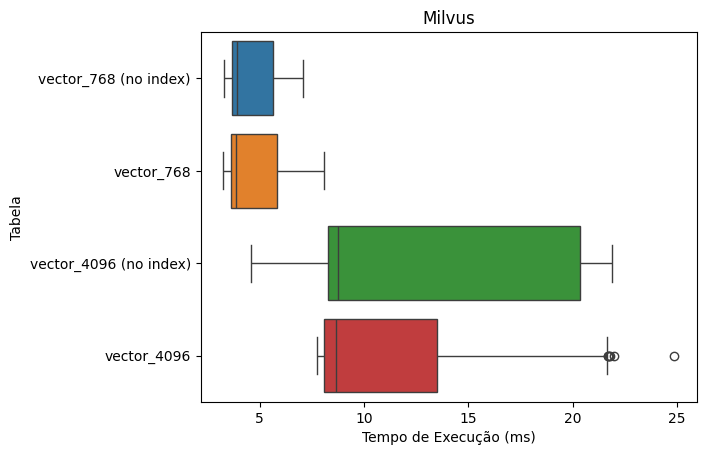

In [128]:
filtered = df.loc[df['dbms'] == 'Milvus']
plot = sns.boxplot(filtered, x='execution_time', y='table', hue='table')
plot.set(xlabel = "Tempo de Execução (ms)", ylabel = "Tabela")
plot.set_title("Milvus")
plot.figure.savefig("./graphs/execucao-milvus-por-tabela.png")

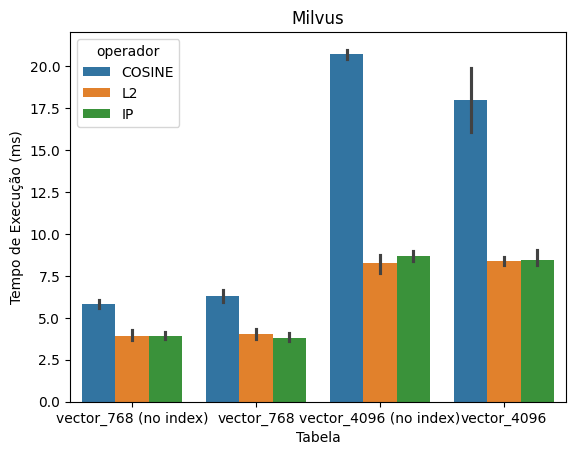

In [129]:
plot = sns.barplot(filtered, x='table', y='execution_time', hue='operator')
plot.set_xlabel("Tabela")
plot.set_ylabel("Tempo de Execução (ms)")
plot.legend(title="operador")
plot.set_title("Milvus")
plot.figure.savefig("./graphs/execucao-milvus-operadores-tabela.png")

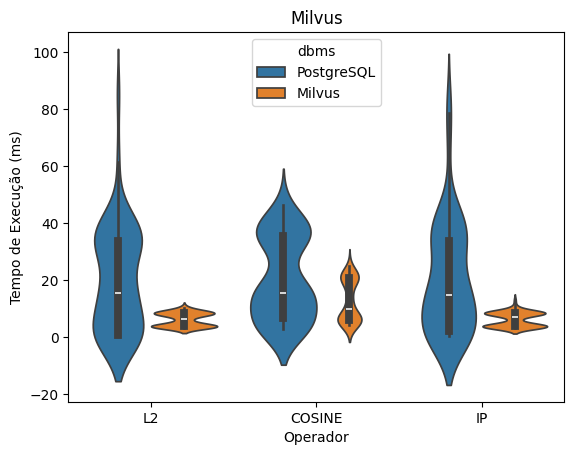

In [132]:
plot = sns.violinplot(df, x='operator', y='execution_time', hue='dbms')
plot.set_xlabel("Operador")
plot.set_ylabel("Tempo de Execução (ms)")
plot.set_title("Milvus")
plot.figure.savefig("./graphs/execucao-milvus-operadores.png")

In [133]:
df = pd.read_csv("milvus_approximate_index_test.csv")
df

,Unnamed: 0,test_num,table,operator,index_similarity,no_index_similarity
0,0,0,vector_768,COSINE,0.080077,0.080077
1,1,0,vector_768,COSINE,0.077028,0.077028
2,2,0,vector_768,COSINE,0.070000,0.070000
3,3,0,vector_768,COSINE,0.069421,0.069421
4,4,0,vector_768,COSINE,0.068643,0.068643
...,...,...,...,...,...,...
535,535,14,vector_4096,IP,55.415291,55.415291
536,536,14,vector_4096,IP,51.080856,51.080856
537,537,14,vector_4096,IP,49.464794,49.464794
538,538,14,vector_4096,IP,48.048817,48.048817


In [134]:
summary = df.copy()
summary['abs_diff'] = abs(summary['index_similarity'] - summary['no_index_similarity'])
group_stats = summary.groupby(['operator'])['abs_diff'].agg(['mean', 'max', 'std']).reset_index()
group_stats

,operator,mean,max,std
0,COSINE,0.0,0.0,0.0
1,IP,0.0,0.0,0.0
2,L2,0.0,0.0,0.0
